# Wrangling

## Imports

In [189]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os


## Read In data

In [190]:
path = r'./data'                     # use your path
files = glob.glob(os.path.join(path, "*.csv"))  

data_frames = []

for file in files:
    data_frames.append(pd.read_csv(file))
    
df = pd.concat(data_frames, ignore_index=True)
df.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN


## Remove rows with NAN values

In [191]:
df = df.dropna().reset_index(drop=True)
df.head()

# unique_count = clean_df['genre'].nunique()
# unique_count #495 combinations in dataset

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt1825683,Black Panther,2018,PG-13,134 min,"Action, Adventure, Sci-Fi",7.3,"T'Challa, heir to the hidden but advanced king...",Ryan Coogler,/name/nm3363032/,"Chadwick Boseman, \nMichael B. Jordan, \nLupit...","/name/nm1569276/,/name/nm0430107/,/name/nm2143...",785813.0,700059566.0
1,tt0092099,Top Gun,1986,PG,109 min,"Action, Drama",6.9,As students at the United States Navy's elite ...,Tony Scott,/name/nm0001716/,"Tom Cruise, \nTim Robbins, \nKelly McGillis, \...","/name/nm0000129/,/name/nm0000209/,/name/nm0000...",461419.0,179800601.0
2,tt0499549,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy",7.9,A paraplegic Marine dispatched to the moon Pan...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",1322694.0,760507625.0
3,tt1392170,The Hunger Games,2012,PG-13,142 min,"Action, Adventure, Sci-Fi",7.2,Katniss Everdeen voluntarily takes her younger...,Gary Ross,/name/nm0002657/,"Jennifer Lawrence, \nJosh Hutcherson, \nLiam H...","/name/nm2225369/,/name/nm1242688/,/name/nm2955...",927499.0,408010692.0
4,tt1160419,Dune,2021,PG-13,155 min,"Action, Adventure, Drama",8.0,A noble family becomes embroiled in a war for ...,Denis Villeneuve,/name/nm0898288/,"Timothée Chalamet, \nRebecca Ferguson, \nZenda...","/name/nm3154303/,/name/nm0272581/,/name/nm3918...",649342.0,108327830.0


## Narrow down columns

In [192]:
df = df.loc[:, ['year', 'certificate', 'runtime', 'genre', 'rating', 'votes', 'gross(in $)']]

df.head()

,year,certificate,runtime,genre,rating,votes,gross(in $)
0,2018,PG-13,134 min,"Action, Adventure, Sci-Fi",7.3,785813.0,700059566.0
1,1986,PG,109 min,"Action, Drama",6.9,461419.0,179800601.0
2,2009,PG-13,162 min,"Action, Adventure, Fantasy",7.9,1322694.0,760507625.0
3,2012,PG-13,142 min,"Action, Adventure, Sci-Fi",7.2,927499.0,408010692.0
4,2021,PG-13,155 min,"Action, Adventure, Drama",8.0,649342.0,108327830.0


## Format Columns

In [193]:
#Format runtimes into floats
def convert_runtime(string):
    return float(string.split(' ')[0])
    
df['runtime'] = df['runtime'].apply(convert_runtime)
df = df[df['runtime'] < 300]
#Format genre by using only first value
def genre_parse(genre):
    genre = genre.split(',')[0]
    genre = genre.lower()
    if genre == 'action':
        return 'act'
    elif genre == 'adventure':
        return 'adv'
    elif genre == 'family':
        return 'fam'
    elif genre == 'crime':
        return 'cri'
    elif genre == 'family':
        return 'fam'
    elif genre == 'fantasy':
        return 'fan'
    elif genre == 'film-noir':
        return 'f-n'
    elif genre =='history':
        return 'his'
    elif genre =='horror':
        return 'hor'
    elif genre =='mystery':
        return 'mys'
    elif genre == 'sci-fi':
        return 'sci'
    elif genre == 'sport':
        return 'spo'
    elif genre == 'thriller':
        return 'thr'
    elif genre == 'war':
        return 'war'
    else:
        return genre
    


df['genre']=df['genre'].apply(genre_parse)
df = df.drop(df.loc[(df['genre'] == 'musical') | (df['genre'] == 'romance') | (df['genre'] == 'biography') | (df['genre']=='animation')].index)
# Format Certificate filter out all data points to only include movies with the G, PG, PG-13, R, and NC-17 ratings, switch Not Rated to NR
def convert_unrated(certificate):
    if certificate == 'Not Rated':
        return 'NR'
    else:
        return certificate
    
df=df.loc[(df['certificate'] == 'R') | (df['certificate'] =='PG-13') | (df['certificate'] == 'PG') | (df['certificate'] == 'Not Rated') | (df['certificate'] =='X') | (df['certificate'] == 'NC-17')]
df['certificate']=df['certificate'].apply(convert_unrated)

#Format years into ints and include only the past 25 years worth of data. 
df['year'] = df['year'].astype(int)
df = df.loc[(df['year'] >= 1997)].reset_index(drop=True)

df.head()

,year,certificate,runtime,genre,rating,votes,gross(in $)
0,2018,PG-13,134.0,act,7.3,785813.0,700059566.0
1,2009,PG-13,162.0,act,7.9,1322694.0,760507625.0
2,2012,PG-13,142.0,act,7.2,927499.0,408010692.0
3,2021,PG-13,155.0,act,8.0,649342.0,108327830.0
4,2001,PG-13,178.0,act,8.8,1889727.0,315544750.0


# Data Engineering

In [194]:
# scale down gross earnings from dollars to millions of dollars
df['gross(in $)'] = df['gross(in $)']/1e6

# EDA

<Figure size 4000x4000 with 0 Axes>

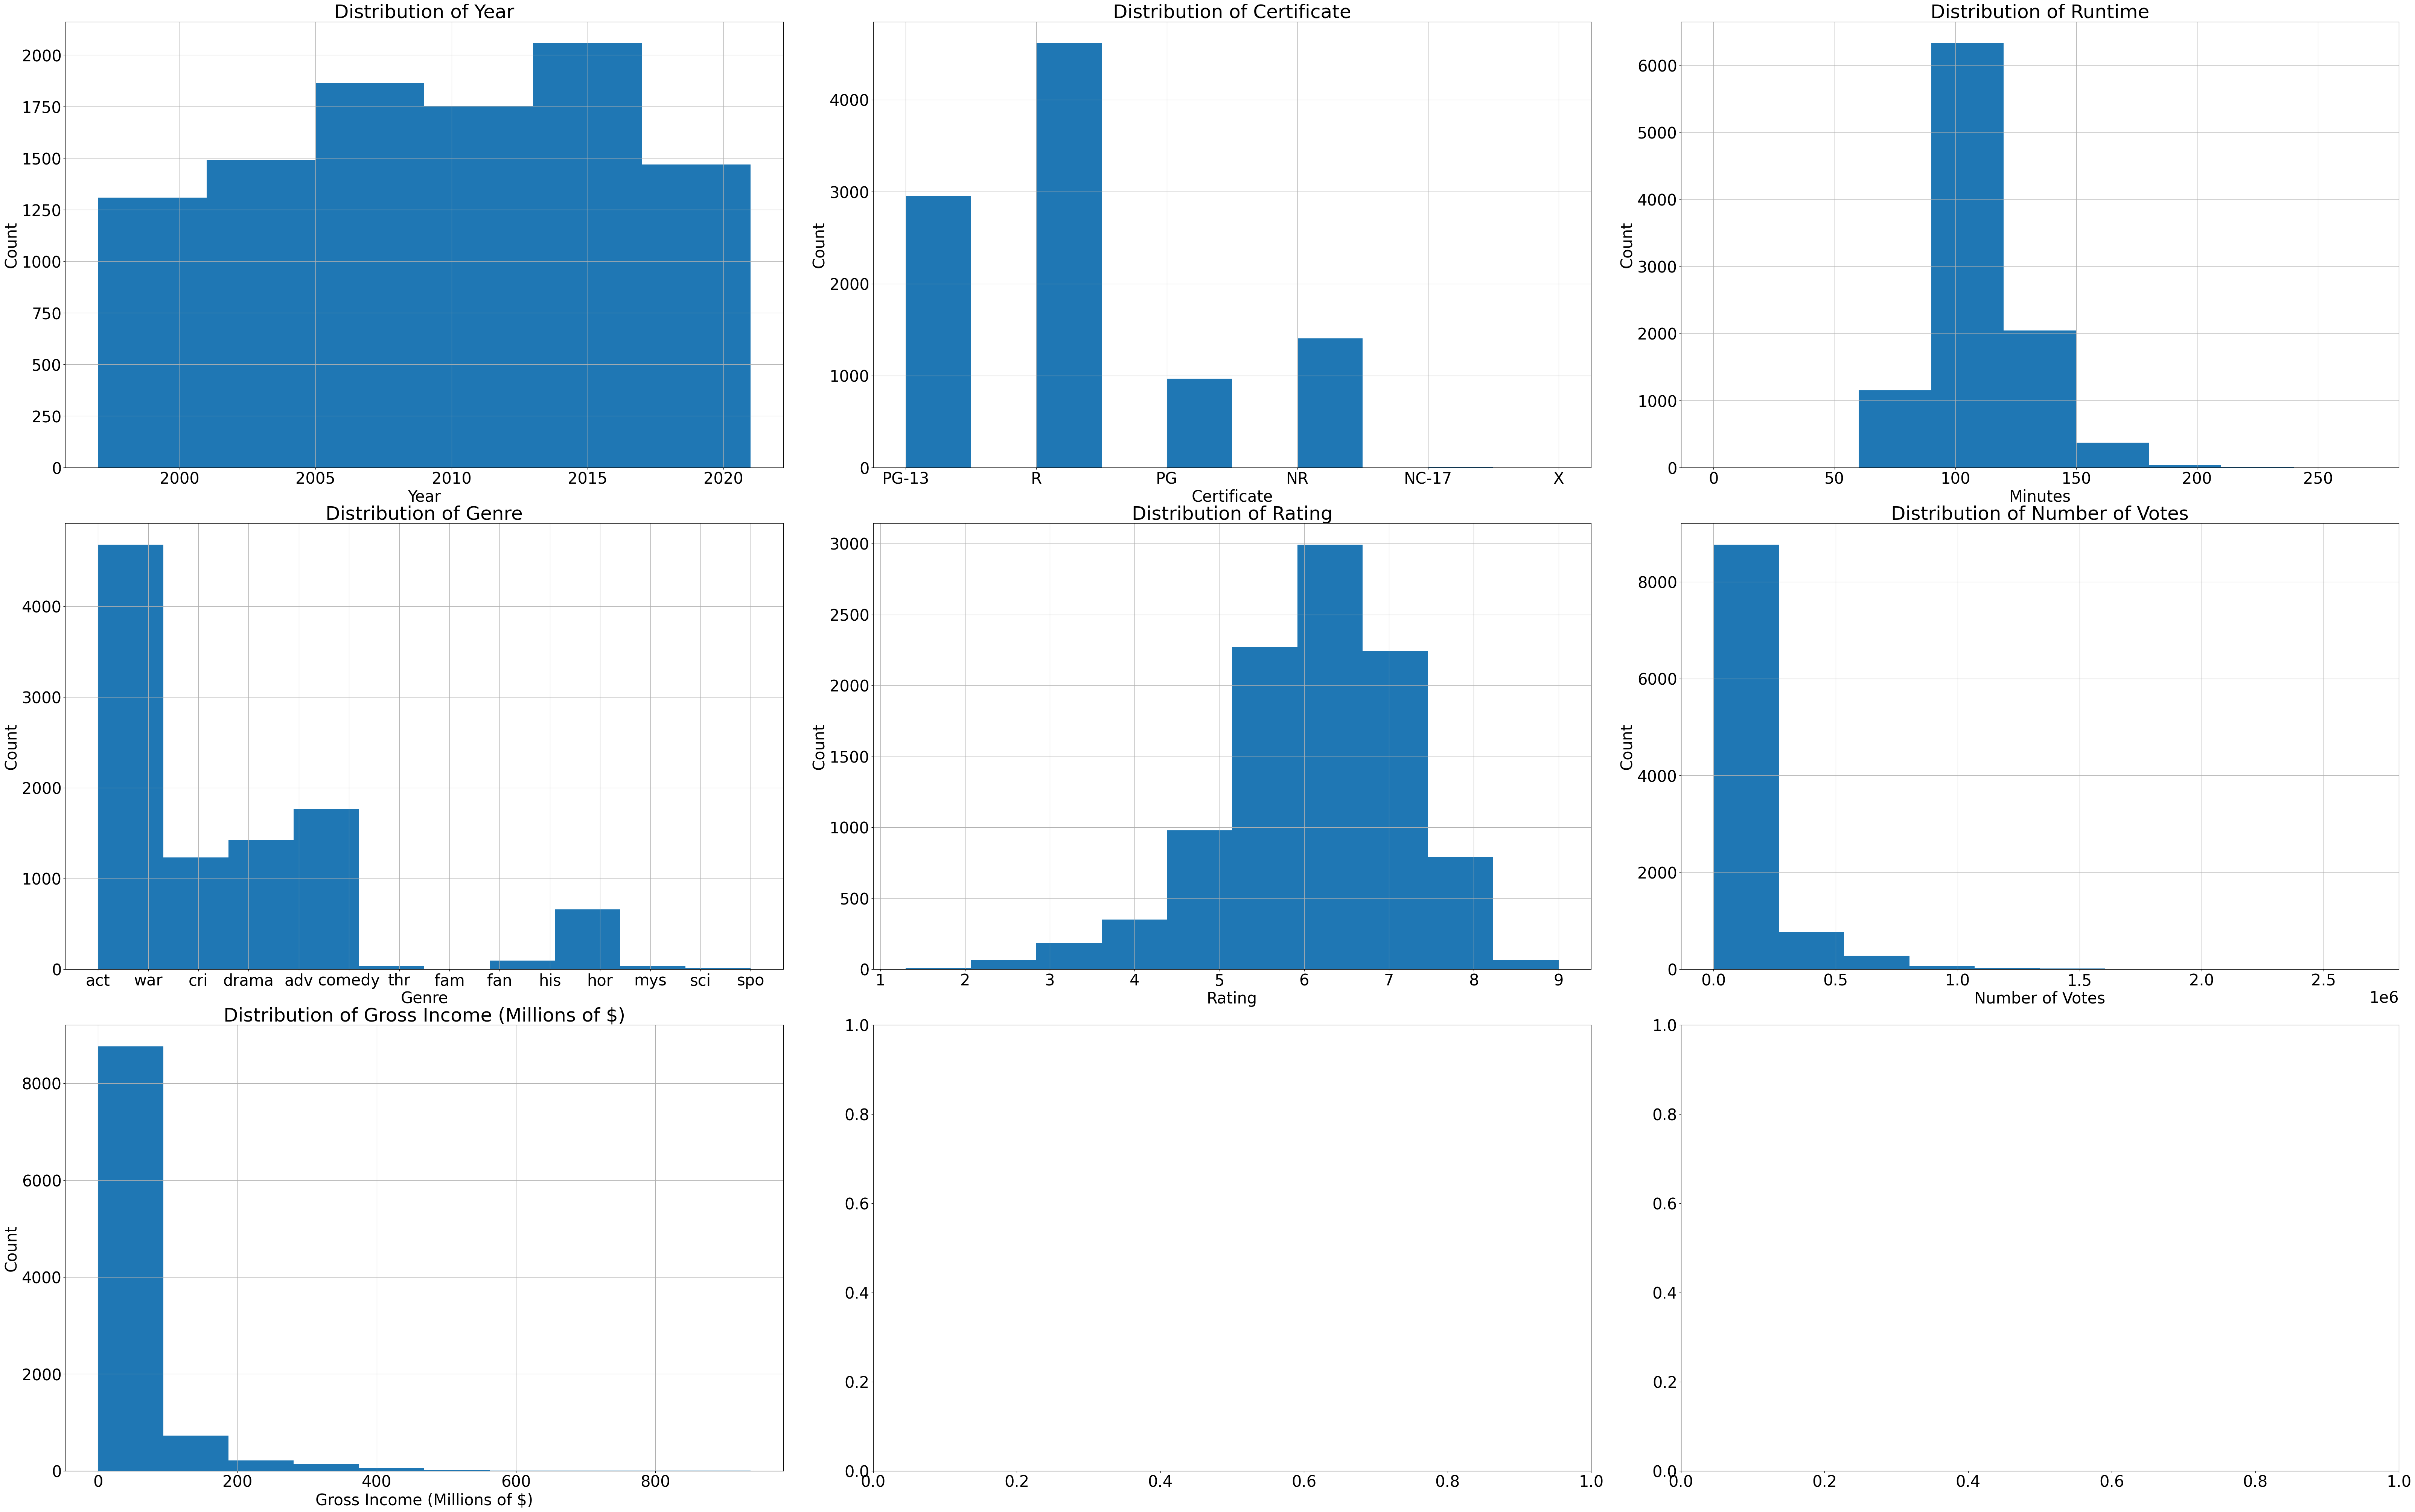

Earliest Year: 1997
Latest Year: 2022
['act' 'war' 'cri' 'drama' 'adv' 'comedy' 'thr' 'fam' 'fan' 'his' 'hor'
 'mys' 'sci' 'spo']
Shortest Movie Runtime: 45.0 min
Longest Movie Runtime: 216.0 min
Average Movie Runtime: 109.17652968954084 min


In [195]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(40,40))
plt.rc('font', size=30)          # controls default text sizes    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30) 
fig, (ax1, ax2, ax3) = plt.subplots(3, 3, gridspec_kw={'wspace':1/8, 'hspace':1/8})

df['year'].hist(bins=range(1997, 2022, 4), ax=ax1[0])
ax1[0].set_xlabel('Year')
ax1[0].set_ylabel('Count')
ax1[0].set_title('Distribution of Year')

df['certificate'].hist(ax=ax1[1])
ax1[1].set_title('Distribution of Certificate')
ax1[1].set_xlabel('Certificate')
ax1[1].set_ylabel('Count')

df['runtime'].hist(bins=range(0, 300, 30), ax=ax1[2])
ax1[2].set_xlabel('Minutes')
ax1[2].set_ylabel('Count')
ax1[2].set_title('Distribution of Runtime')

df['genre'].hist(ax=ax2[0],figsize=(80,50))
ax2[0].set_title('Distribution of Genre')
ax2[0].set_xlabel('Genre')
ax2[0].set_ylabel('Count')

df['rating'].hist(ax=ax2[1])
ax2[1].set_title('Distribution of Rating')
ax2[1].set_xlabel('Rating')
ax2[1].set_ylabel('Count')

df['votes'].hist(ax=ax2[2])
ax2[2].set_title('Distribution of Number of Votes')
ax2[2].set_xlabel('Number of Votes')
ax2[2].set_ylabel('Count')

df['gross(in $)'].hist(ax=ax3[0])
ax3[0].set_title('Distribution of Gross Income (Millions of $)')
ax3[0].set_xlabel('Gross Income (Millions of $)')
ax3[0].set_ylabel('Count')

plt.show()

print('Earliest Year:', df['year'].min())
print('Latest Year:', df['year'].max())

print(df['genre'].unique())

print('Shortest Movie Runtime:', df['runtime'].min(), 'min')
print('Longest Movie Runtime:', df['runtime'].max(), 'min')
print('Average Movie Runtime:', df['runtime'].mean(), 'min')


Text(0, 0.5, 'Gross Income (Millions of $)')

<Figure size 6000x4000 with 0 Axes>

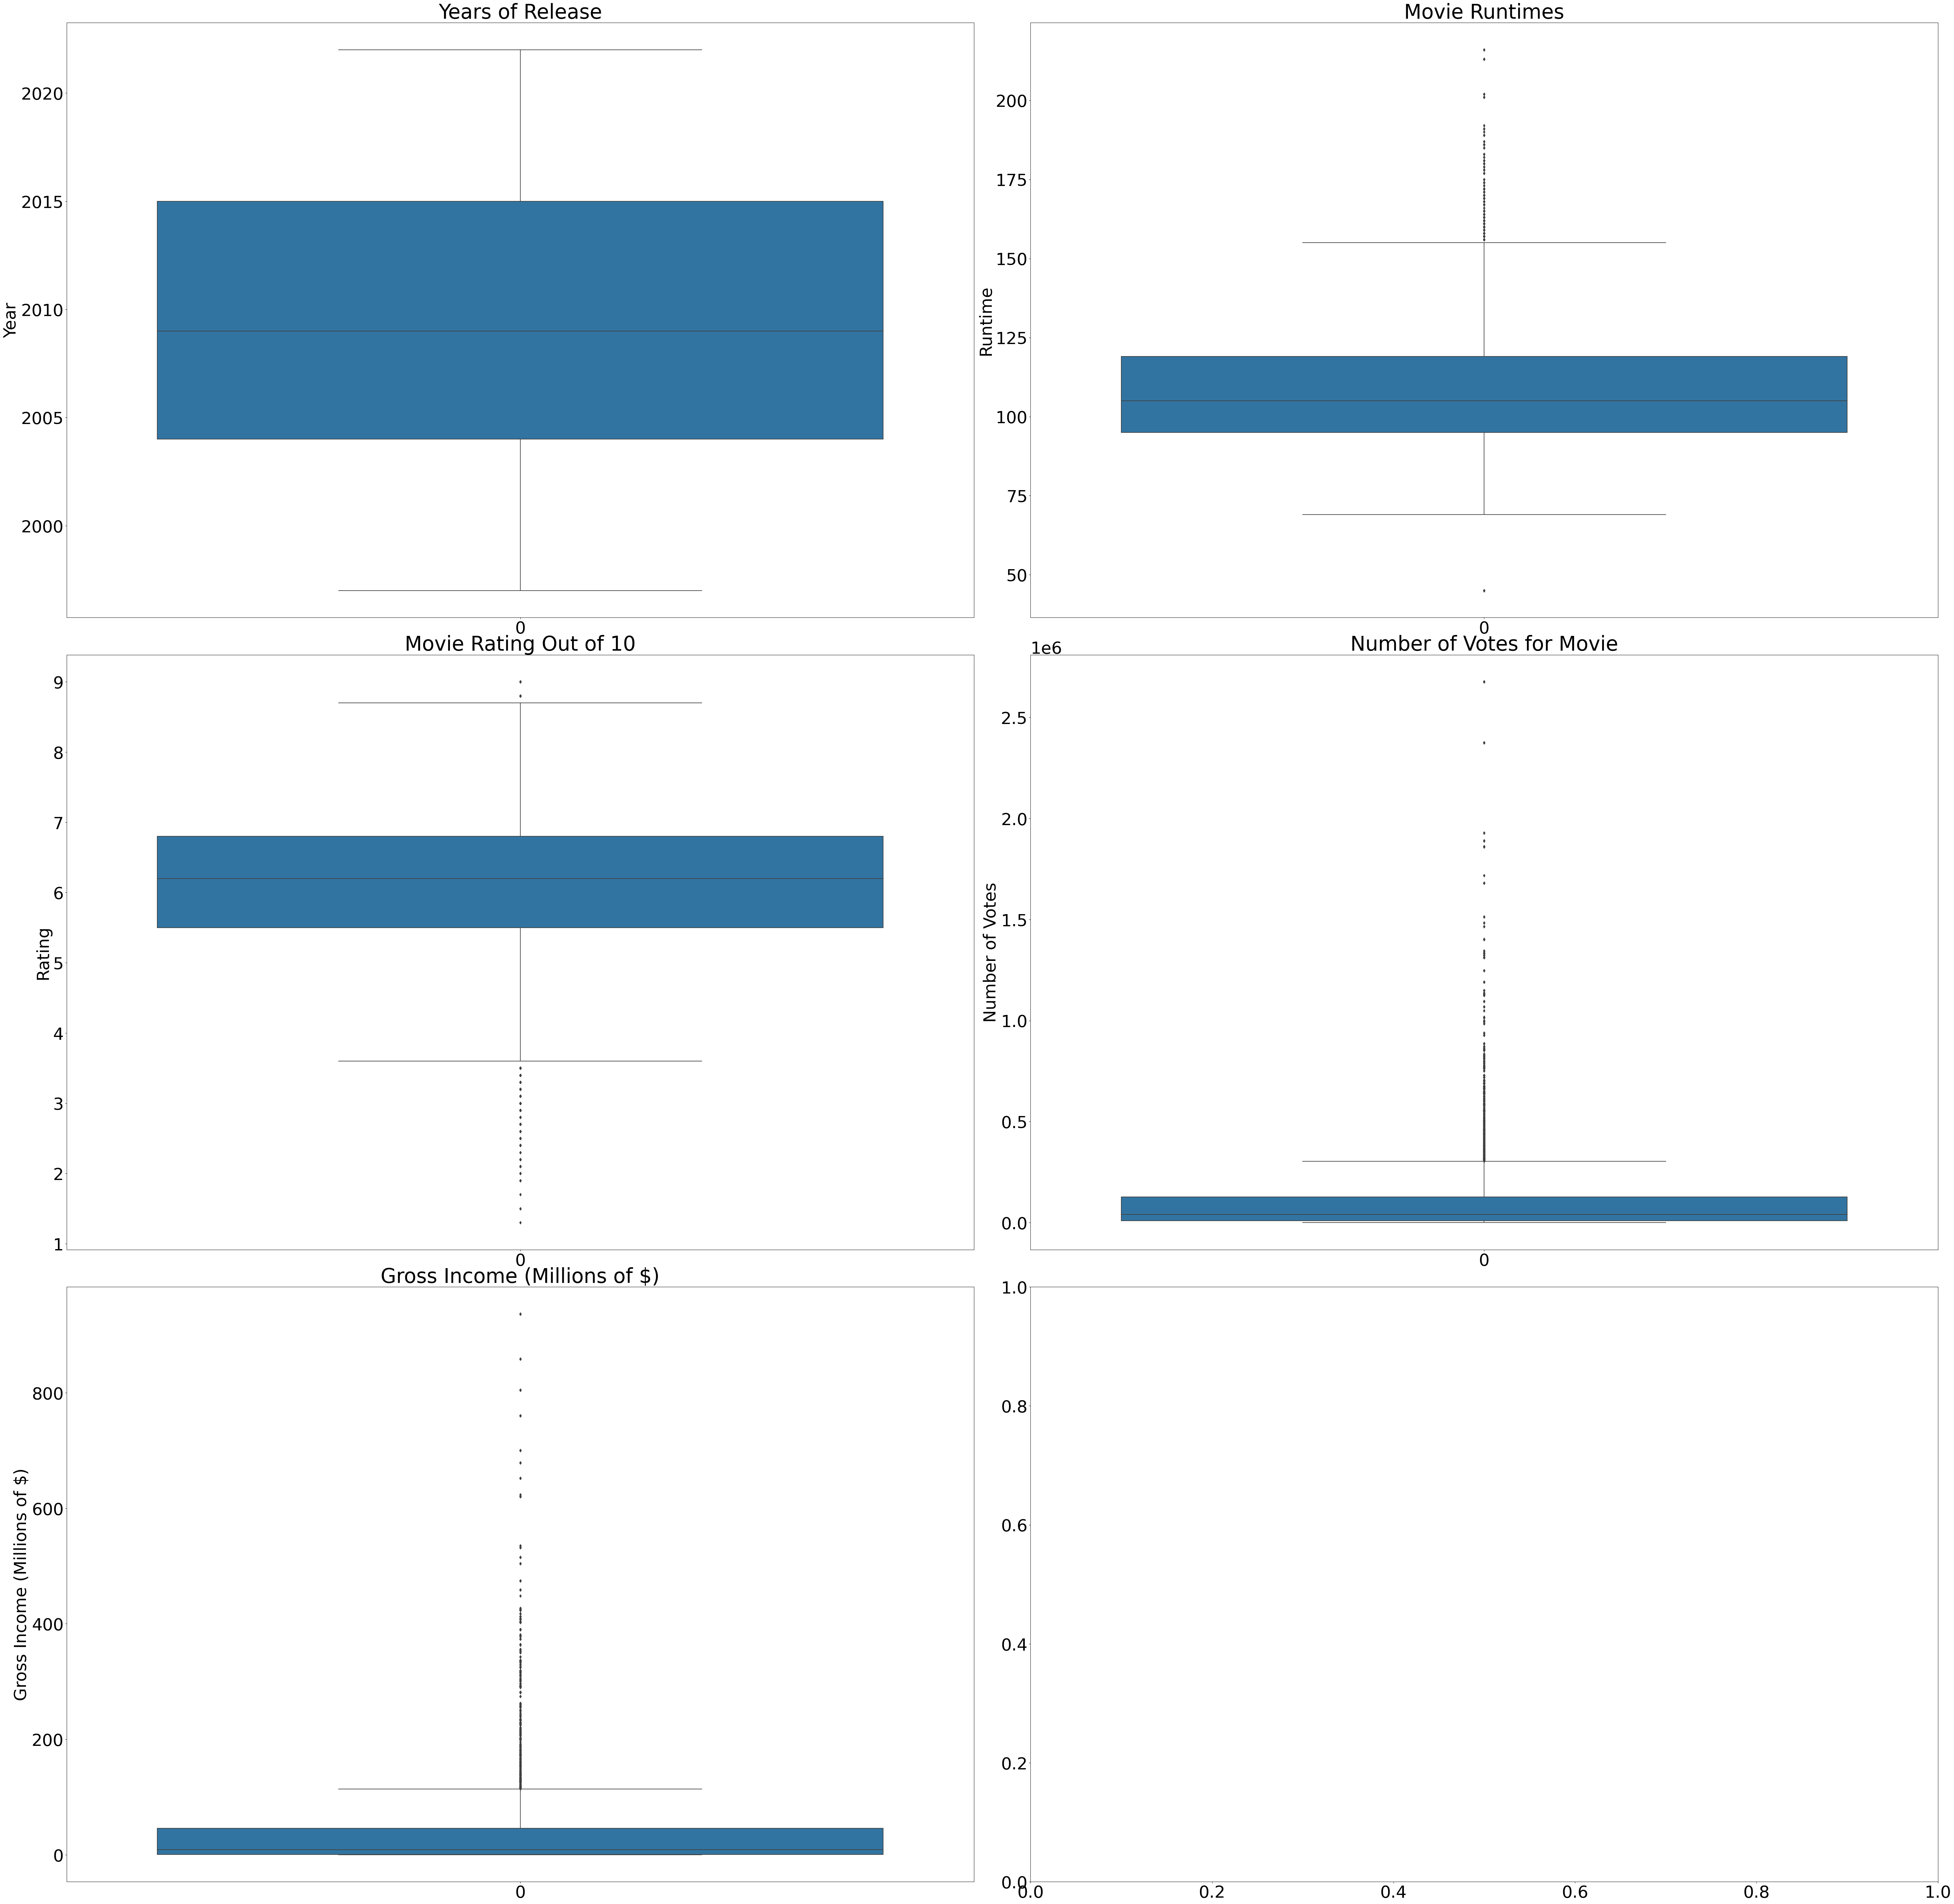

In [228]:
import seaborn as sns
plt.figure(figsize=(60,40))
plt.rc('font', size=40)          # controls default text sizes    # fontsize of the x and y labels
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40) 
fig, (ax1, ax2, ax3) = plt.subplots(3, 2, gridspec_kw={'wspace':1/16, 'hspace':1/16}, figsize=(80, 80))

sns.boxplot(df['year'],ax=ax1[0])
ax1[0].set_title('Years of Release')
ax1[0].set_ylabel('Year')

sns.boxplot(df['runtime'],ax=ax1[1])
ax1[1].set_title('Movie Runtimes')
ax1[1].set_ylabel('Runtime')

sns.boxplot(df['rating'],ax=ax2[0])
ax2[0].set_title('Movie Rating Out of 10')
ax2[0].set_ylabel('Rating')

sns.boxplot(df['votes'],ax=ax2[1])
ax2[1].set_title('Number of Votes for Movie')
ax2[1].set_ylabel('Number of Votes')

sns.boxplot(df['gross(in $)'],ax=ax3[0])
ax3[0].set_title('Gross Income (Millions of $)')
ax3[0].set_ylabel('Gross Income (Millions of $)')

In [197]:
q3= df['runtime'].quantile(0.75)
q1= df['runtime'].quantile(0.25)
IQR=q3-q1
outliers_upper = df['runtime'].loc[df['runtime'] > q3 + 1.5 * IQR]
outliers_lower = df['runtime'].loc[df['runtime'] < q1 - 1.5 * IQR]
num_outliers_runtime = len(outliers_lower)+len(outliers_upper)
print("Number of outliers detected in runtime data: " + str(num_outliers_runtime))

Number of outliers detected in runtime data: 273


In [198]:
q3= df['rating'].quantile(0.75)
q1= df['rating'].quantile(0.25)
IQR=q3-q1
outliers_upper = df['rating'].loc[df['rating'] > q3 + 1.5 * IQR]
outliers_lower = df['rating'].loc[df['rating'] < q1 - 1.5 * IQR]
num_outliers_rating = len(outliers_lower)+len(outliers_upper)
print("Number of outliers detected in ratings data: " + str(num_outliers_rating))

Number of outliers detected in ratings data: 233


In [200]:
df['year'] = df['year'].astype(int)
q3= df['year'].quantile(0.75)
q1= df['year'].quantile(0.25)
IQR=q3-q1
outliers_upper = df['year'].loc[df['year'] > q3 + 1.5 * IQR]
outliers_lower = df['year'].loc[df['year'] < q1 - 1.5 * IQR]
num_outliers_year = len(outliers_lower)+len(outliers_upper)
print("Number of outliers detected in year data: " + str(num_outliers_year))

Number of outliers detected in year data: 0


In [227]:
import seaborn as sns
# Correlation Matrix, dropping Film-Noir since none are in our dataframe anymore from the last 25 years
feature_df = df.drop(columns=['Animation', 'Biography', 'Comedy', 'Drama', 'Music', 'Musical', 'Romance', 'Western', 'Film-Noir'])
sns.set(rc={'figure.figsize':(12, 8)})
sns.heatmap(feature_df.corr(), annot=True)

KeyError: "['Animation', 'Biography', 'Comedy', 'Drama', 'Music', 'Musical', 'Romance', 'Western', 'Film-Noir'] not found in axis"


<font size="8">Using 'Year' as Numerical</font>


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['year', 'certificate', 'runtime', 'rating', 'votes',
                                                            'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                                                            'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
                                                    , df['gross(in $)'], test_size=0.2, random_state=42)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(X_train['rating'], bins=20)
ax[0].set_title('Training Set')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Frequency')
ax[1].hist(X_test['rating'], bins=20)
ax[1].set_title('Test Set')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Frequency')
plt.show()

In [ ]:
num_scaler = StandardScaler()
ohe_encoder = OneHotEncoder()

In [ ]:
X_train_num = X_train[['year', 'runtime', 'rating', 'votes',
                      'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                       'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
X_train_cat = X_train[['certificate']]

X_train_num_scaled = num_scaler.fit_transform(X_train_num)
X_train_cat_encoded = ohe_encoder.fit_transform(X_train_cat)

In [ ]:
X_train_preprocessed = pd.concat([
    pd.DataFrame(X_train_num_scaled, columns=['year', 'runtime', 'rating', 'votes',
                                             'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 
                                              'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']),
    pd.DataFrame(X_train_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate']))
], axis=1)

In [ ]:
X_test_num = X_test[['year', 'runtime', 'rating', 'votes', 
                     'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                     'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
X_test_cat = X_test[['certificate']]

X_test_num_scaled = num_scaler.transform(X_test_num)
X_test_cat_encoded = ohe_encoder.transform(X_test_cat)

In [ ]:
X_test_preprocessed = pd.concat([
    pd.DataFrame(X_test_num_scaled, columns=['year', 'runtime', 'rating', 'votes', 
                                             'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 
                                             'Film-Noir', 'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']),
    pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate']))
], axis=1)

<font size="5">Linear Regression</font>

In [ ]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=['year', 'runtime', 'rating', 'votes', 'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']), 
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate']))], axis=1))

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Gross Box Office Earnings")
plt.ylabel("Predicted Gross Box Office Earnings")
plt.show()

<font size="5">Decision Tree</font>

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(X_test_preprocessed)

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

<font size="8">Using Year as Categorical (5-year increment)</font>

In [ ]:
df['year_category'] = (((df['year'] - 1910) // 5) * 5 + 1910) // 10 * 10
df['year_category'] = df['year_category'].apply(lambda x: str(x) + '-' + str(x+4) if (x+3) < 2023 else str(x) + '-2022')
df

In [ ]:
year_counts = df['year_category'].value_counts().sort_index()
year_counts.plot.bar()
plt.title('Distribution of Year Category')
plt.xlabel('Year Category')
plt.ylabel('Count')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['certificate', 'runtime', 'rating', 'votes', 'year_category',
                                                            'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                                                            'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
                                                    , df['gross(in $)'], test_size=0.2, random_state=42)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(X_train['rating'], bins=20)
ax[0].set_title('Training Set')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Frequency')
ax[1].hist(X_test['rating'], bins=20)
ax[1].set_title('Test Set')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Frequency')
plt.show()

In [ ]:
# Distribution of Genres
# Extract the genre columns from the train and test sets
genre_cols = ['Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
              'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']
X_train_genre = X_train[genre_cols]
X_test_genre = X_test[genre_cols]

# Plot the histograms
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(X_train_genre.values, bins=20, label=genre_cols)
ax[0].set_title('Training Set')
ax[0].set_xlabel('Genre')
ax[0].set_ylabel('Frequency')
ax[0].legend()
ax[1].hist(X_test_genre.values, bins=20, label=genre_cols)
ax[1].set_title('Test Set')
ax[1].set_xlabel('Genre')
ax[1].set_ylabel('Frequency')
ax[1].legend()
plt.show()

In [ ]:
X_train_num = X_train[['runtime', 'rating', 'votes', 
                      'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                       'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
X_train_cat = X_train[['certificate', 'year_category']]

X_train_num_scaled = num_scaler.fit_transform(X_train_num)
X_train_cat_encoded = ohe_encoder.fit_transform(X_train_cat)

In [ ]:
X_train_preprocessed = pd.concat([
    pd.DataFrame(X_train_num_scaled, columns=['runtime', 'rating', 'votes',
                                             'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 
                                              'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']),
    pd.DataFrame(X_train_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate','year_category']))
], axis=1)

In [ ]:
X_test_num = X_test[['runtime', 'rating', 'votes', 
                     'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                     'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
X_test_cat = X_test[['certificate', 'year_category',]]

X_test_num_scaled = num_scaler.transform(X_test_num)
X_test_cat_encoded = ohe_encoder.transform(X_test_cat)

In [ ]:
X_test_preprocessed = pd.concat([
    pd.DataFrame(X_test_num_scaled, columns=['runtime', 'rating', 'votes', 
                                             'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 
                                             'Film-Noir', 'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']),
    pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate', 'year_category']))
], axis=1)

<font size="5">Linear Regression</font>

In [ ]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=['runtime', 'rating', 'votes', 
                                                                           'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 
                                                                           'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']), 
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate', 'year_category']))], axis=1))

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Gross Box Office Earnings")
plt.ylabel("Predicted Gross Box Office Earnings")
plt.show()

<font size="5">Decision Tree</font>

In [ ]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train_preprocessed, y_train)
y_pred= model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=['runtime', 'rating', 'votes', 
                                                                           'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 
                                                                           'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']),
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate', 'year_category']))], axis=1))

feature_names = X_train_preprocessed.columns
plt.figure(figsize=(50, 10))
plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

<font size="5">SVR</font>

In [ ]:
model = SVR(kernel='rbf', C=100, gamma='auto')
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=['runtime', 'rating', 'votes', 'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']), 
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate', 'year_category']))], axis=1))

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

<font size="5">Random Forest</font>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_preprocessed, y_train)

y_pred = rf.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=['runtime', 'rating', 'votes', 
                                                                           'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 
                                                                           'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']), 
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate', 'year_category']))], axis=1))
mse = mean_squared_error(y_test, y_pred)
print(mse)

<font size="5">XGBoost</font>

In [ ]:
model = xgb.XGBRegressor()
model.fit(X_train_preprocessed, y_train)

y_pred = model.predict(X_test_preprocessed)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rmse)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [ ]:
xgb.plot_importance(model)
plt.show()

<font size="5">XGBoost</font>